In [1]:
import numpy as np
import collections
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.stats import binom
from scipy.stats import chi2
prob = np.full(shape=6,fill_value=1/6,dtype=np.float32)
cube = np.arange(1,7)
prob



array([0.16666667, 0.16666667, 0.16666667, 0.16666667, 0.16666667,
       0.16666667], dtype=float32)

In [192]:

np.random.choice(cube, p=prob)



4

In [193]:
result = np.array([])

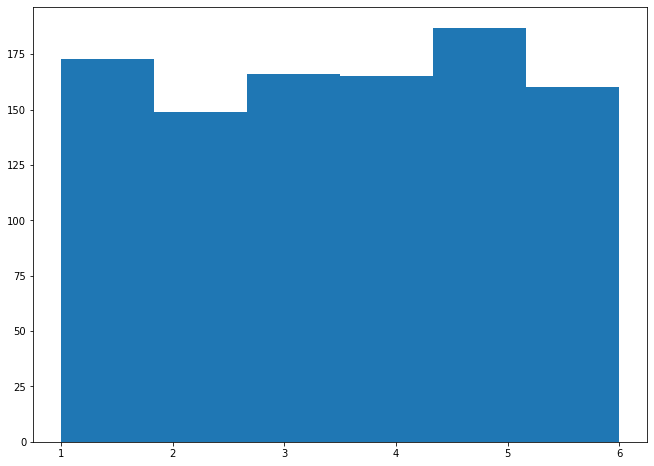

In [194]:


result = np.array([])
for i in range(1000):
    result = np.append(result,[np.random.choice(cube, p=prob)])

fig, ax = plt.subplots()
fig.set_size_inches(11,8)
ax.hist(result, bins=6)


plt.show()

In [195]:
collections.Counter(result)

Counter({2.0: 149, 3.0: 166, 6.0: 160, 4.0: 165, 1.0: 173, 5.0: 187})

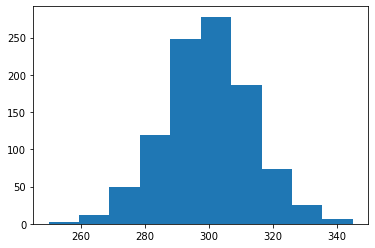

In [196]:

binm =  np.random.binomial( n=1000, p=0.3, size=1000)
fig, ax = plt.subplots()
ax.hist(binm, bins=10)
plt.show()

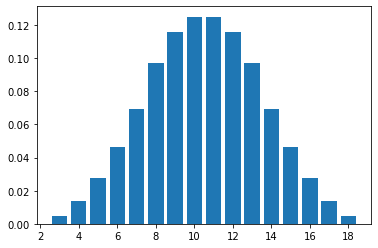

In [252]:

cube = np.full(shape=16, fill_value=0, dtype=np.float32)
prob = np.full(shape=6,fill_value=1/6,dtype=np.float32)
result = np.full(shape=16, fill_value=0, dtype=np.float32)
win = np.arange(3,19)
cube[0] = 1
n = 3
for m in range(0,n):
    for i, c in enumerate(cube):
        for j, k in enumerate(prob):
            try:
                result[i+j] += k*c
            except IndexError:
                pass
    for i, c in enumerate(cube):
        cube[i] = result[i]
        result[i] = 0

fig, ax = plt.subplots()
ax.bar(win,cube)

plt.show()

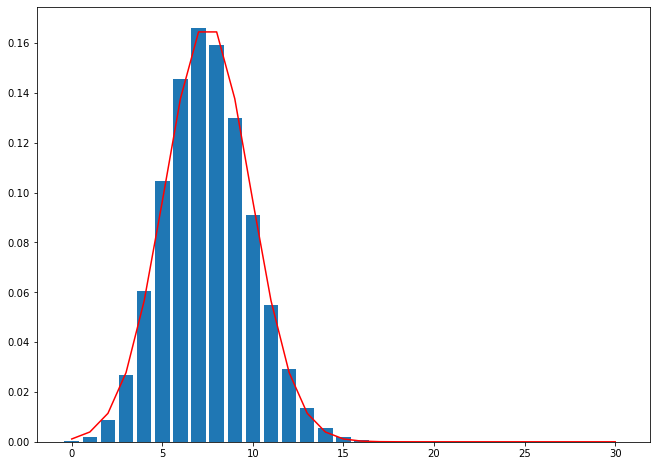

In [2]:

prob = 1/4
n = 30
x = np.arange(0,n+1)
result = [ binom.pmf(r, n, prob) for r in x]


ex = np.sum([ x[i]*result[i] for i in range(0, len(result)-1)])
s = np.sum([ (sr - ex)**2*result[i]for sr, i in enumerate(x) ])
s = np.sqrt(s)


fig, ax = plt.subplots()
fig.set_size_inches(11,8)
ax.bar(x,result)
ax.plot(x, norm.pdf(x,ex,s), c='r')

plt.show()

In [290]:
s

2.3717082451262788

Markov Chain example


In [302]:
x = [0,1,2]  # 0 - burger, 1 - pizza, 2 - hotdog
p = np.array([[0.2,0.6,0.2],
              [0.3,0,0.7],
              [0.5,0,0.5]
             ])
p

array([[0.2, 0.6, 0.2],
       [0.3, 0. , 0.7],
       [0.5, 0. , 0.5]])

In [312]:
result = []
start_state = x[0]
curr_state = start_state
result.append(curr_state)

for i in range(0,8):
    curr_state = np.random.choice(x,p=p[curr_state])
    result.append(curr_state)
result

[0, 2, 0, 1, 2, 2, 2, 2, 2]

Sposob pierwszy: Wykorzystanie random choica, natomiast ten sposob trwa bardzo długo, ponieważ
musimy iterowac ogromną ilość razy co spowalnia program

In [410]:
steps = 10**4
start_state = x[0]
curr_state = start_state
pi = np.array([0,0,0])
pi[curr_state] = 1

for i in range(0,steps):
    curr_state = np.random.choice(x, p=p[curr_state])
    pi[curr_state] += 1

print(pi/steps)

[0.3509 0.2088 0.4404]


Mnożenie macierzy przez siebieand

In [411]:
p_n = p
steps = 10**3

for i in range(0, steps):
    p_n = np.matmul(p_n,p)

print(p_n[0])

[0.35211268 0.21126761 0.43661972]


Znalezeienie lewego wektora wlasnego

In [424]:

import scipy.linalg
values, left  = scipy.linalg.eig(p, right=False, left=True)
pi = left[:,0]
pi_normalized = [(x/np.sum(pi)).real for x in pi]
pi_normalized




[0.352112676056338, 0.21126760563380279, 0.43661971830985913]

burger -> burger -> pizza -> hotdog -> hotdog -> pizza -> burger -> pizza -> burger -> hotdog -> hotdog

In [428]:
def find_prob(seq, p, pi):
    start_state = seq[0]
    prob = pi[start_state]
    prev_state, curr_state = start_state, start_state
    for i in range(1, len(seq)):
        curr_state = seq[i]
        prob *= p[prev_state][curr_state]
        prev_state = curr_state
    return prob

print(find_prob([0,0,1,2,0,1,2],p,pi_normalized))

0.006211267605633802


In [2]:


def normal_approxination_to_binomial(n,p):
    mi = n*p
    sigma = np.sqrt(n*p*(1-p))
    return mi, sigma

# Propability for random number
normal_probability_below = norm.cdf
def normal_probability_above(rand, mi=0, sigma=1):
    return 1 - norm.cdf(rand,mi,sigma)
def normal_probability_between(l_rand, h_rand, mi=0, sigma=1):
    return norm.cdf(h_rand, mi, sigma) - norm.cdf(l_rand, mi, sigma)
def normal_probability_outside(l_rand, h_rand, mi=0, sigma=1):
    return 1 - normal_probability_between(l_rand,h_rand)

# Finding bounds for propability
def normal_upper_bound(prob, mi=0, sigma=1):
    """ Na jakiej wartosci konczy sie prob% przedzialu """
    return norm.ppf(prob, mi, sigma)

def normal_lower_bound(prob, mi=0, sigma=1):
    """ Nad jaka wartoscia znajduje sie prob % przedziału"""
    return norm.ppf(1-prob, mi, sigma)

def normal_two_sided_bounds(prob, mi=0, sigma=1):
    "W jakim przedziale miescie sie prob% wartosci "
    tail_probability = (1-prob)/2
    upper_bound = normal_lower_bound(tail_probability, mi, sigma)
    lower_bound = normal_upper_bound(tail_probability,mi, sigma)
    return lower_bound, upper_bound



In [16]:
#normal_upper_bound(0.8)
normal_probability_below((360-332)/248.5)

0.5448563076928541

In [5]:
normal_two_sided_bounds(	0.99730028)

(-3.000008581547954, 3.000008581547967)

In [6]:
mi_0, sigma_0 = normal_approxination_to_binomial(1000,0.5)

In [7]:
normal_two_sided_bounds(0.95, mi_0, sigma_0)

(469.0102483847719, 530.9897516152281)

In [8]:
lo, hi = normal_two_sided_bounds(0.95, mi_0, sigma_0)
mi_1, sigma_1 = normal_approxination_to_binomial(1000, 0.55)
type_2_probability = normal_probability_between(lo, hi, mi_1, sigma_1)
power = 1 - type_2_probability
power

0.8865477810983827

In [9]:
hi = normal_upper_bound(0.95, mi_0, sigma_0)
type_2_probability = normal_probability_below(hi, mi_1,sigma_1)
power = 1- type_2_probability

In [10]:
power, hi

(0.936378997857743, 526.0074193937779)

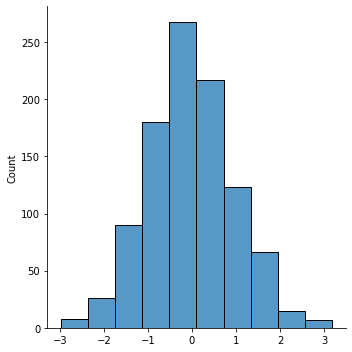

In [329]:
 import random


 result = []
 for i in range(1000):
     result.append(random.gauss(0,1))

 
 sns.displot(result, bins=10)
 plt.show()

-0.2575040274622038

/home/szymon/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


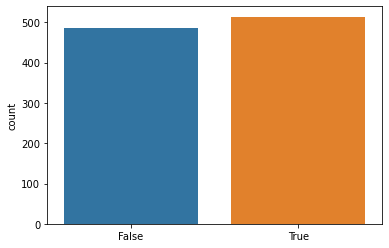

In [426]:
result = []
for _ in range(1000):
    result.append( True if np.random.rand() < 0.5  else False)

sns.countplot(result)
plt.show()


In [433]:
from scipy.stats import poisson
# Prawdopodobienstwo wyolosowania 500 reszek i orłow  w 1000 rzutach
poisson.pmf(500,1000*0.5)



0.017838267869512373